<a href="https://colab.research.google.com/github/sonalabzqueen/js/blob/main/dissertation_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns

# Disable scientific notation
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.6f}'.format

## Solana Price Dynamics

There is hypes generated from $Trump social media post and token.

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/sonalabzqueen/js/refs/heads/main/historical_data_solana_4_2025.csv')
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
# remove records with ignore = 1
df = df[df['ignore'] == 0]
df.set_index('close_time', inplace=True)
df

,datetime,open_price,high_price,low_price,close_price,volume,quote_asset_volume,number_of_trades,taker_buy_base,taker_buy_quote,ignore
close_time,,,,,,,,,,,
2024-12-27 23:59:59.999,2024-12-27 20:00:00,186.900000,187.000000,183.130000,184.220000,219006.024000,40480224.634900,134152,120442.145000,22254196.769570,0
2024-12-28 03:59:59.999,2024-12-28 00:00:00,184.220000,186.010000,183.820000,185.030000,183303.245000,33907562.419580,139946,108376.224000,20048345.445110,0
2024-12-28 07:59:59.999,2024-12-28 04:00:00,185.030000,186.320000,184.260000,185.130000,172811.415000,32031799.059800,97404,81833.896000,15172141.279730,0
2024-12-28 11:59:59.999,2024-12-28 08:00:00,185.130000,187.360000,185.000000,187.190000,183668.430000,34210588.836450,110913,84291.824000,15702322.522020,0
2024-12-28 15:59:59.999,2024-12-28 12:00:00,187.190000,191.300000,186.500000,190.180000,326507.097000,61731702.229900,192393,165857.147000,31353050.706570,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-06 03:59:59.999,2025-04-06 00:00:00,120.330000,121.130000,119.430000,119.980000,217230.754000,26111057.871670,124541,99363.431000,11940749.760250,0
2025-04-06 07:59:59.999,2025-04-06 04:00:00,119.990000,120.600000,118.820000,119.210000,213970.852000,25602593.579990,125137,98576.024000,11797986.691930,0
2025-04-06 11:59:59.999,2025-04-06 08:00:00,119.200000,120.180000,118.180000,118.620000,214065.208000,25505231.286940,143116,101759.553000,12126409.163200,0


In [53]:
# Select data from Jan 1 to Jan 30, 2025
jan_df = df.loc['2025-01-01':'2025-01-31'].copy()

# Assuming your DataFrame is called df and 'close_time' is the index
jan_df.index = pd.to_datetime(jan_df.index)  # Ensure datetime index

# Resample to daily OHLCV
df_daily = jan_df.resample('D').agg({
    'open_price': 'first',
    'high_price': 'max',
    'low_price': 'min',
    'close_price': 'last',
    'volume': 'sum',
    'quote_asset_volume': 'sum',
    'number_of_trades': 'sum',
    'taker_buy_base': 'sum',
    'taker_buy_quote': 'sum',
    'ignore': 'last'  # usually 0, or you can drop this if not needed
})

# Drop any days with no data (e.g., market closed)
df_daily.dropna(subset=['open_price'], inplace=True)
# Calculate daily returns on the original data
df_daily['return'] = df_daily['close_price'].pct_change() * 100
df_daily.fillna(0, inplace=True)
df_daily.head()

,open_price,high_price,low_price,close_price,volume,quote_asset_volume,number_of_trades,taker_buy_base,taker_buy_quote,ignore,return
close_time,,,,,,,,,,,
2025-01-01,189.310000,195.330000,188.000000,194.280000,1655160.102000,316558431.706990,865024,857581.801000,163984899.358310,0,0.000000
2025-01-02,194.280000,210.480000,193.430000,208.310000,3224923.982000,660170412.599000,1615355,1719021.330000,351938125.202540,0,7.221536
2025-01-03,208.300000,219.830000,205.630000,217.990000,3251086.556000,694370536.022360,1394237,1695959.554000,362159960.777750,0,4.646920
2025-01-04,218.000000,218.180000,213.540000,216.670000,1943711.390000,420200326.942430,890249,975959.843000,211027480.214500,0,-0.605532
2025-01-05,216.670000,219.050000,211.460000,213.410000,2101040.545000,451130694.576640,902175,988852.241000,212589805.044260,0,-1.504592


In [72]:
# Identify high return days (return > mean + 1 std dev)
avg_return = df_daily['return'].mean()
std_return = df_daily['return'].std()
high_return_threshold = avg_return + 1.5*std_return
df_daily['high_return'] = df_daily['return'] > high_return_threshold

# Print summary statistics
print(f"Average daily return: {avg_return:.2f}%")
print(f"High return threshold: {high_return_threshold:.2f}%")
print(f"Number of high return days: {df_daily['high_return'].sum()}")
print("\nHigh return days:")
print(df_daily[df_daily['high_return']].sort_values('return', ascending=False)[['return']])

Average daily return: 0.70%
High return threshold: 8.50%
Number of high return days: 2

High return days:
              return
close_time          
2025-01-18 19.343082
2025-01-15  9.751026


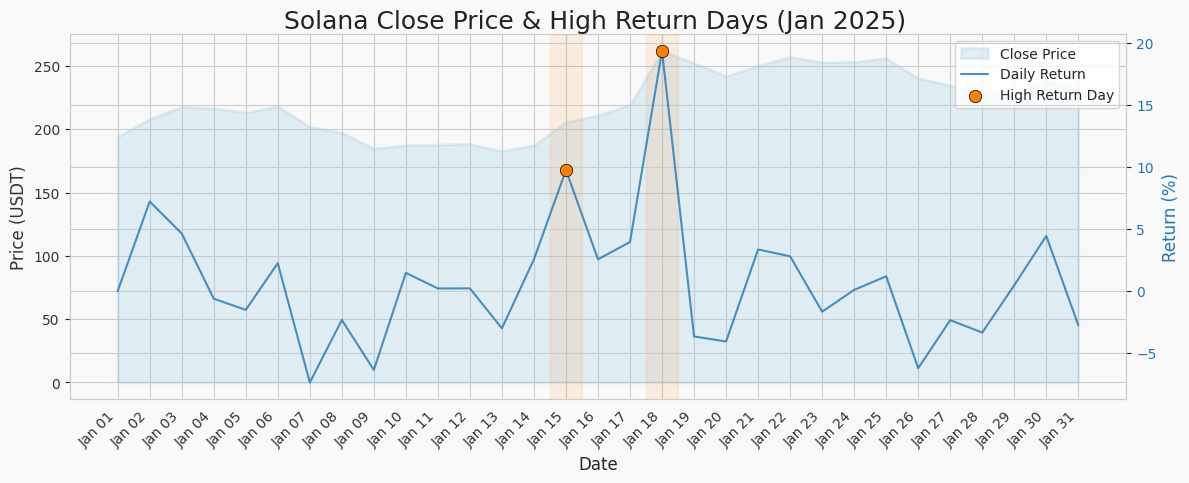

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Light theme setup
sns.set_style("whitegrid")
plt.rcParams['axes.facecolor'] = '#f9f9f9'
plt.rcParams['figure.facecolor'] = '#f9f9f9'
plt.rcParams['axes.edgecolor'] = '#cccccc'

# Create figure and main axis
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot close price with light blue fill
ax1.fill_between(df_daily.index, df_daily['close_price'],
                 color='#a6cee3', linewidth=2, alpha=0.3, label='Close Price')

ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Price (USDT)', fontsize=12, color='#333333')
ax1.tick_params(axis='y', labelcolor='#333333')
ax1.tick_params(axis='x', labelcolor='#333333')

# Create secondary y-axis for returns
ax2 = ax1.twinx()
ax2.plot(df_daily.index, df_daily['return'],
         color='#1f78b4', linewidth=1.5, alpha=0.8, label='Daily Return')
ax2.set_ylabel('Return (%)', fontsize=12, color='#1f78b4')
ax2.tick_params(axis='y', labelcolor='#1f78b4')

# Highlight high return days
high_return_days = df_daily[df_daily['high_return']]

ax2.scatter(high_return_days.index, high_return_days['return'],
            color='#ff7f00', s=80, zorder=5, label='High Return Day', edgecolors='black', linewidth=0.5)

# Highlight x-axis background under high return days
for date in high_return_days.index:
    ax1.axvspan(date - pd.Timedelta(hours=12), date + pd.Timedelta(hours=12), color='#ff7f00', alpha=0.1)

# Title and layout
fig.suptitle('Solana Close Price & High Return Days (Jan 2025)', fontsize=18, color='#222222')
fig.autofmt_xdate()
fig.tight_layout()
fig.subplots_adjust(top=0.93)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', frameon=True, facecolor='white', edgecolor='#cccccc')

import matplotlib.dates as mdates

# Set all x-ticks to daily frequency
ax1.set_xticks(df_daily.index)

# Format date labels nicely
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Rotate x-ticks for readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Highlight high-return date labels
for label in ax1.get_xticklabels():
    try:
        label_date = pd.to_datetime(label.get_text())
        if label_date in high_return_days.index:
            label.set_color('#ff7f00')  # Highlight color
            label.set_fontweight('bold')
        else:
            label.set_color('#333333')  # Default
    except Exception:
        pass  # In case of empty/partial ticks
plt.show()
